In [1]:
import numpy as np 
import pandas as pd 
import random
import matplotlib.pyplot as plt 
pd.set_option('display.max_rows', 200)
%matplotlib inline

# Import Data 

### Appeals

In [33]:
# main table 
tblAppeal = pd.read_csv('data/raw/tblAppeal.csv')
print(tblAppeal.info())
tblAppeal.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 870388 entries, 0 to 870387
Data columns (total 17 columns):
idnAppeal             870388 non-null int64
idncase               868758 non-null float64
idnProceeding         776380 non-null float64
strAppealCategory     870388 non-null object
strAppealType         870388 non-null object
datAppealFiled        870226 non-null object
strFiledBy            870378 non-null object
datAttorneyE27        521008 non-null object
datBIADecision        847196 non-null object
strBIADecision        847180 non-null object
strBIADecisionType    822882 non-null object
strCaseType           824855 non-null object
strLang               773811 non-null object
strNat                777004 non-null object
strProceedingIHP      367364 non-null object
strCustody            666356 non-null object
strProbono            1880 non-null object
dtypes: float64(2), int64(1), object(14)
memory usage: 112.9+ MB
None


,idnAppeal,idncase,idnProceeding,strAppealCategory,strAppealType,datAppealFiled,strFiledBy,datAttorneyE27,datBIADecision,strBIADecision,strBIADecisionType,strCaseType,strLang,strNat,strProceedingIHP,strCustody,strProbono
181962,186193,4361052.0,2917026.0,IJ,Case Appeal,1997-02-18 00:00:00,A,NaN,1997-08-25 00:00:00,DSO,P,DEP,SP,MX,*,D,NaN
129980,131897,5016159.0,NaN,DD,DD Visa,1995-03-13 00:00:00,A,1995-03-09 00:00:00,1995-11-06 00:00:00,REM,R,NaN,NaN,NaN,NaN,NaN,NaN
374043,4538847,4225888.0,2749014.0,IJ,Case Appeal,2002-08-02 00:00:00,A,NaN,2003-12-09 00:00:00,SAV,P,RMV,ENG,FJ,,N,NaN
558052,4729842,3683135.0,3834213.0,IJ,Case Appeal,2006-03-06 00:00:00,A,NaN,2007-12-14 00:00:00,DVD,P,RMV,SP,MX,NaN,N,NaN
707828,4881593,5836047.0,4652465.0,IJ,Case Appeal,2009-10-08 00:00:00,A,2009-10-08 00:00:00,2012-02-21 00:00:00,DVD,R,RMV,ENG,KR,NaN,N,NaN
474502,4642665,4551968.0,3151883.0,IJ,Case Appeal,2004-07-14 00:00:00,A,2004-07-14 00:00:00,2005-07-29 00:00:00,SAF,P,RMV,WLF,SS,NaN,N,NaN
511425,4681553,5187102.0,NaN,DD,DD Fines,2002-04-22 00:00:00,A,2002-04-22 00:00:00,2005-05-02 00:00:00,DIS,P,NaN,NaN,NaN,NaN,NaN,NaN
19756,19782,2168280.0,264163.0,IJ,Case Appeal,1985-04-25 00:00:00,A,NaN,1990-05-11 00:00:00,WDL,P,DEP,SP,MX,NaN,NaN,NaN
401947,4567765,3717153.0,2078305.0,IJ,MTR BIA,2003-03-03 00:00:00,A,2003-03-03 00:00:00,2003-05-21 00:00:00,DEN,P,RMV,PUN,IN,,N,NaN
266674,4425327,5012084.0,NaN,DD,DD 212,1998-12-02 00:00:00,A,NaN,1999-07-22 00:00:00,DUT,P,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# drop appeals with no case number, proceeding number, or decision 
tblAppeal.dropna(subset=['idncase', 'idnProceeding', 'strBIADecision'], inplace=True) 
tblAppeal = tblAppeal[tblAppeal['idnProceeding'] != 0] # drop zeros 

# convert indexes to integers 
tblAppeal['idncase'] = tblAppeal['idncase'].astype(int) 
tblAppeal['idnProceeding'] = tblAppeal['idnProceeding'].astype(int) 
tblAppeal.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 755222 entries, 0 to 869457
Data columns (total 17 columns):
idnAppeal             755222 non-null int64
idncase               755222 non-null int64
idnProceeding         755222 non-null int64
strAppealCategory     755222 non-null object
strAppealType         755222 non-null object
datAppealFiled        755060 non-null object
strFiledBy            755212 non-null object
datAttorneyE27        478717 non-null object
datBIADecision        755222 non-null object
strBIADecision        755222 non-null object
strBIADecisionType    731103 non-null object
strCaseType           755180 non-null object
strLang               752329 non-null object
strNat                754061 non-null object
strProceedingIHP      365943 non-null object
strCustody            643730 non-null object
strProbono            1842 non-null object
dtypes: int64(3), object(14)
memory usage: 103.7+ MB


In [35]:
# format column types 
tblAppeal['datAppealFiled_dt'] = pd.to_datetime(tblAppeal['datAppealFiled'], errors='coerce')
tblAppeal['datBIADecision_dt'] = pd.to_datetime(tblAppeal['datBIADecision'], errors='coerce')
tblAppeal['datAppealFiled_year'] = tblAppeal['datAppealFiled_dt'].dt.year

In [36]:
# code lookup tables 
bia_appeal_category = pd.read_excel('data/raw/BIA Appeal Data File code translations.xlsx', 
                                    sheetname='BIA Appeal Category', skip_footer=7)
bia_appeal_type = pd.read_excel('data/raw/BIA Appeal Data File code translations.xlsx', 
                                sheetname='BIA Appeal Type', skip_footer=3)
bia_decision_type = pd.read_excel('data/raw/BIA Appeal Data File code translations.xlsx', 
                                  sheetname='BIA decision type', skip_footer=2)
bia_decision_code = pd.read_excel('data/raw/BIA Appeal Data File code translations.xlsx', 
                                  sheetname='BIA decision code', skip_footer=2)

In [37]:
# join them 
tblAppeal_df = tblAppeal.merge(bia_appeal_category, how='left', left_on='strAppealCategory', right_on='Code')\
                        .rename(columns={'Description': 'strAppealCategoryDesc'}).drop('Code', axis=1)\
                        .merge(bia_appeal_type, how='left', left_on='strAppealType', right_on='Code')\
                        .rename(columns={'Description': 'strAppealTypeDesc'}).drop('Code', axis=1)\
                        .merge(bia_decision_code, how='left', left_on='strBIADecision', right_on='Code')\
                        .rename(columns={'Description': 'strBIADecisionDesc'}).drop('Code', axis=1)\
                        .merge(bia_decision_type, how='left', left_on='strBIADecisionType', right_on='Code')\
                        .rename(columns={'Description': 'strBIADecisionTypeDesc'}).drop('Code', axis=1)
print(tblAppeal_df.info()) 
tblAppeal_df.sample(10).T

<class 'pandas.core.frame.DataFrame'>
Int64Index: 755222 entries, 0 to 755221
Data columns (total 24 columns):
idnAppeal                 755222 non-null int64
idncase                   755222 non-null int64
idnProceeding             755222 non-null int64
strAppealCategory         755222 non-null object
strAppealType             755222 non-null object
datAppealFiled            755060 non-null object
strFiledBy                755212 non-null object
datAttorneyE27            478717 non-null object
datBIADecision            755222 non-null object
strBIADecision            755222 non-null object
strBIADecisionType        731103 non-null object
strCaseType               755180 non-null object
strLang                   752329 non-null object
strNat                    754061 non-null object
strProceedingIHP          365943 non-null object
strCustody                643730 non-null object
strProbono                1842 non-null object
datAppealFiled_dt         755060 non-null datetime64[ns]
datB

,438202,269492,181918,529006,554786,520013,281839,583253,672415,64638
idnAppeal,4648103,4461649,4359616,4752137,4781174,4742002,4475844,4813708,4918974,64747
idncase,4268557,2708276,2607967,5129108,5600795,5481538,3925857,4213658,6097261,2590032
idnProceeding,2801133,963227,823344,3894065,4039838,3892687,2340123,2734376,4668751,802405
strAppealCategory,IJ,IJ,IJ,IJ,IJ,IJ,IJ,IJ,IJ,IJ
strAppealType,Case Appeal,Case Appeal,Case Appeal,MTR BIA,Case Appeal,Case Appeal,Case Appeal,Case Appeal,Case Appeal,Case Appeal
datAppealFiled,2004-08-23 00:00:00,2000-06-19 00:00:00,1997-09-03 00:00:00,2006-08-16 00:00:00,2007-04-13 00:00:00,2006-05-25 00:00:00,2000-11-24 00:00:00,2008-01-18 00:00:00,2010-09-08 00:00:00,1992-05-14 00:00:00
strFiledBy,A,A,A,A,A,I,A,A,A,A
datAttorneyE27,2004-08-23 00:00:00,2001-07-05 00:00:00,NaN,2006-08-16 00:00:00,NaN,NaN,NaN,2008-07-14 00:00:00,2010-09-08 00:00:00,NaN
datBIADecision,2005-12-01 00:00:00,2002-10-30 00:00:00,1998-04-20 00:00:00,2006-09-18 00:00:00,2007-07-23 00:00:00,2007-05-11 00:00:00,2003-03-12 00:00:00,2009-09-24 00:00:00,2011-09-30 00:00:00,1994-04-06 00:00:00
strBIADecision,REM,REM,DIS,DEN,SAF,REM,SAF,DIS,BCR,DIS


In [38]:
# some strBIADecision don't have corresponding code translations; to remove 
print(tblAppeal_df[pd.isnull(tblAppeal_df['strBIADecisionDesc'])]['strBIADecision'].value_counts()) 
tblAppeal_df.dropna(subset=['strBIADecisionDesc'], inplace=True)
tblAppeal_df.info()

DSO    5987
DED    2107
CPG    1704
ABC    1606
APD    1170
GRS     431
DNS     421
ADM     355
DMO     238
CPC      90
MB       88
SNC      82
AFD      54
RET      52
ADD      18
CGR      16
TPD      16
REV      13
WPD       5
SUP       4
          2
Name: strBIADecision, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 740763 entries, 0 to 755221
Data columns (total 24 columns):
idnAppeal                 740763 non-null int64
idncase                   740763 non-null int64
idnProceeding             740763 non-null int64
strAppealCategory         740763 non-null object
strAppealType             740763 non-null object
datAppealFiled            740609 non-null object
strFiledBy                740753 non-null object
datAttorneyE27            470111 non-null object
datBIADecision            740763 non-null object
strBIADecision            740763 non-null object
strBIADecisionType        717284 non-null object
strCaseType               740721 non-null object
strLang          

### Master Proceedings

In [8]:
master = pd.read_csv('data/raw/master.csv') 
print master.info()
master.sample(10)

/Users/Gary/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6084437 entries, 0 to 6084436
Data columns (total 16 columns):
idncase             float64
nat                 object
case_type           object
c_asy_type          object
idnproceeding       object
base_city_code      object
hearing_loc_code    object
dec_type            object
dec_code            object
other_comp          object
osc_date            object
input_date          object
comp_date           object
attorney_flag       float64
ij_code             object
tracid              float64
dtypes: float64(3), object(13)
memory usage: 742.7+ MB
None


,idncase,nat,case_type,c_asy_type,idnproceeding,base_city_code,hearing_loc_code,dec_type,dec_code,other_comp,osc_date,input_date,comp_date,attorney_flag,ij_code,tracid
5573785,6816645.0,GT,RMV,NaN,5597614,PHO,PHO,NaN,NaN,NaN,07JUL2011,02AUG2011,NaN,NaN,JWR,177.0
3956672,5480793.0,GV,RMV,I,3891800,NYC,NYC,O,R,NaN,29MAR2006,10APR2006,26JUL2006,1.0,PLM,150.0
2282997,3831236.0,ES,RMV,NaN,2215764,LOS,LOS,W,X,NaN,28FEB1998,08DEC1998,15JAN1999,1.0,DDB,89.0
1865222,3494030.0,SF,RMV,NaN,1814792,PHO,PHO,O,R,NaN,28AUG1998,18FEB1999,15NOV2001,1.0,DAL,258.0
3175995,4484829.0,NaN,RMV,NaN,3069100,ELO,EAZ,NaN,NaN,X,NaN,NaN,30JUL2004,NaN,CLR,NaN
1503837,3204359.0,MX,DEP,NaN,1584654,DET,CLE,O,D,NaN,20JUN1996,25JUN1996,25JUN1996,NaN,JRF,28.0
2284495,3832262.0,GT,RMV,NaN,2217216,HOD,HOD,7,X,NaN,01AUG1998,03AUG1998,11AUG1998,NaN,SY,237.0
167780,2177333.0,MX,DEP,NaN,275439,DEN,DEN,NaN,NaN,O,10MAY1983,19SEP1988,11OCT1988,NaN,JMS,NaN
479017,2420445.0,ES,DEP,NaN,588034,LOS,LOS,W,D,NaN,29NOV1990,22MAY1991,18JUN1991,NaN,RJD,NaN
5808475,6999707.0,CU,RMV,NaN,5860269,ATL,ATL,O,NaN,C,21NOV2011,21DEC2011,10DEC2012,NaN,EBW,132.0


In [9]:
# check missing data 
master.isnull().sum()

idncase                  14
nat                   16775
case_type                15
c_asy_type          4449366
idnproceeding             0
base_city_code           24
hearing_loc_code       1516
dec_type            1519549
dec_code            1674748
other_comp          4744870
osc_date              33353
input_date            29744
comp_date            335076
attorney_flag       3044591
ij_code               39598
tracid               341914
dtype: int64

In [10]:
# look up tables 
master_case_type = pd.read_csv('data/raw/master_case_type.csv')
master_decision_type = pd.read_csv('data/raw/master_decision_type.csv')
master_decision_on_proceeding = pd.read_csv('data/raw/master_decision_on_proceeding.csv')
master_decision_on_proceeding.drop(['Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6'], axis=1, inplace=True)

In [11]:
# add column to indicate whether decision was listed in dec_code or other_comp 
master['dec_col'] = np.where(pd.notnull(master['dec_code']), 'C', 'O') 
master['dec_judge'] = np.where(pd.notnull(master['dec_code']), master['dec_code'], master['other_comp']) 

In [12]:
# join to look up tables
master_df = master.merge(master_decision_type, how='left', left_on='dec_type', right_on='strCode')\
                  .rename(columns={'strDescription': 'dec_type_str'}).drop('strCode', axis=1)\
                  .merge(master_case_type, how='left', left_on='case_type', right_on='strCode')\
                  .rename(columns={'strDescription': 'case_type_str'}).drop('strCode', axis=1)\
                  .merge(master_decision_on_proceeding, how='left', left_on=['case_type', 'dec_judge', 'dec_col'], 
                         right_on=['strCaseType', 'strDecCode', 'strDecType'])\
                  .rename(columns={'strDecDescription': 'dec_code_str'}).drop(['strCaseType', 'strDecCode', 'strDecType'], axis=1)
master_df.sample(10)

,idncase,nat,case_type,c_asy_type,idnproceeding,base_city_code,hearing_loc_code,dec_type,dec_code,other_comp,...,input_date,comp_date,attorney_flag,ij_code,tracid,dec_col,dec_judge,dec_type_str,case_type_str,dec_code_str
4303039,5769472.0,HO,RMV,NaN,4256916,HLG,HLG,NaN,NaN,C,...,21JUN2007,02OCT2007,NaN,MB,61.0,O,C,NaN,Removal,Change of Venue
2184274,3752132.0,MX,RMV,NaN,2120394,PIS,PIS,7,X,NaN,...,27JAN1998,05FEB1998,NaN,HEA,59.0,C,X,type of form where decision is deportation/rem...,Removal,Remove
1326093,3063435.0,GT,DEP,NaN,1412290,HLG,HLG,NaN,NaN,P,...,08AUG1991,18SEP1991,NaN,GZM,NaN,O,P,NaN,Deportation,Temporary Protected Status
5221629,6535754.0,MX,RMV,NaN,5222238,SLC,SLC,O,R,NaN,...,29JUN2010,03JAN2011,1.0,DBP,302.0,C,R,oral decision,Removal,Relief Granted
933118,2758197.0,BR,DEP,NaN,1033581,NOL,NOL,O,T,NaN,...,21AUG1995,08MAR1996,1.0,JZ,50.0,C,T,oral decision,Deportation,Terminate
531239,2462000.0,DR,DEP,NaN,641131,NYC,NYC,NaN,NaN,A,...,02NOV1989,14DEC1989,NaN,PAR,153.0,O,A,NaN,Deportation,Administrative Closing - Other
2703246,4134877.0,GZ,RMV,I,2620592,NYC,NYC,W,X,NaN,...,16MAR2001,06DEC2001,1.0,JSC,139.0,C,X,written decision,Removal,Remove
4224128,5704133.0,MX,RMV,NaN,4173424,IMP,CAL,7,X,NaN,...,12MAR2007,15MAR2007,NaN,DRJ,75.0,C,X,type of form where decision is deportation/rem...,Removal,Remove
1837256,3471364.0,MX,DEP,E,5617721,NYC,NYC,NaN,NaN,Y,...,23AUG2011,10OCT2012,1.0,AVP,359.0,O,Y,NaN,Deportation,Prosecutorial Discretion � Admin Close
3878274,5413677.0,BR,RMV,NaN,3809177,SFR,SFD,O,X,NaN,...,21DEC2005,01FEB2006,NaN,ASM,198.0,C,X,oral decision,Removal,Remove


In [13]:
# keep only cases related to appeals 
# master = master_raw[master_raw['idncase'].isin(tblAppeal['idncase'])].copy() 
# master.info() 

### Master Proceedings (processed data from Daniel Chen)

In [14]:
master_dchen = pd.read_stata('data/decision_sched_merge_adjdate.dta')
master_dchen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5664753 entries, 0 to 5664752
Columns: 106 entries, idncase to flag_datemismatch
dtypes: category(12), float32(2), float64(50), int16(3), int32(3), int8(4), object(32)
memory usage: 3.7+ GB


In [19]:
# keep only cases related to appeals 
# master_dchen = master_dchen[master_dchen['idncase'].isin(tblAppeal['idncase'])].copy() 
# master_dchen.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 893458 entries, 3 to 5664695
Columns: 108 entries, idncase to dec_judge
dtypes: category(12), float32(2), float64(50), int16(3), int32(3), int8(4), object(34)
memory usage: 615.2+ MB


In [15]:
# check for nulls 
master_dchen.isnull().sum()

idncase                                 0
nat                                     0
case_type                               0
c_asy_type                              0
idnproceeding                           0
base_city_code                          0
hearing_loc_code                        0
dec_type                                0
dec_code                                0
other_comp                              0
attorney_flag                     2907462
ij_code                                 0
tracid                             248615
comp_year                               0
comp_month                              0
comp_day                                0
comp_date                               0
osc_year                            32420
osc_month                           32420
osc_day                             32420
osc_date                            32420
input_year                          27549
input_month                         27549
input_day                         

In [16]:
master_dchen.sample(3).T

,4494264,2715672,3057914
idncase,6687724,4402533,4907282
nat,MX,JM,CS
case_type,RMV,RMV,RMV
c_asy_type,,,
idnproceeding,5422859,2969197,3330761
base_city_code,LVG,ORL,ELP
hearing_loc_code,LVG,BDC,ELP
dec_type,O,,O
dec_code,X,,X
other_comp,,T,


In [17]:
# add column to indicate whether decision was listed in dec_code or other_comp 
master_dchen['dec_col'] = np.where(pd.notnull(master_dchen['dec_code']), 'C', 'O') 
master_dchen['dec_judge'] = np.where(pd.notnull(master_dchen['dec_code']), master_dchen['dec_code'], master_dchen['other_comp']) 

In [18]:
# join to look up tables
master_dchen_df = master_dchen.merge(master_decision_type, how='left', left_on='dec_type', right_on='strCode')\
                              .rename(columns={'strDescription': 'dec_type_str'}).drop('strCode', axis=1)\
                              .merge(master_case_type, how='left', left_on='case_type', right_on='strCode')\
                              .rename(columns={'strDescription': 'case_type_str'}).drop('strCode', axis=1)\
                              .merge(master_decision_on_proceeding, how='left', 
                                     left_on=['case_type', 'dec_judge', 'dec_col'], 
                                     right_on=['strCaseType', 'strDecCode', 'strDecType'])\
                              .rename(columns={'strDecDescription': 'dec_code_str'}).drop(['strCaseType', 'strDecCode', 'strDecType'], axis=1)
master_dchen_df.sample(3).T

,5552120,5249888,3846132
idncase,6806458,5884085,5829605
nat,SL,GT,GT
case_type,RMV,RMV,RMV
c_asy_type,,,I
idnproceeding,5583990,4400190,4331762
base_city_code,BAL,ATL,MIA
hearing_loc_code,BAL,ATD,MIA
dec_type,W,,O
dec_code,,,X
other_comp,A,T,


### Master Proceedings (processed by Sagent/Dunn)

In [19]:
master_dunn = pd.read_csv('data/AsylumAdj/data_for_model/_decision_scheduling_merge_final_converted.csv')
master_dunn.info()

/Users/Gary/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (37,104,105,108,116,117,118,121,134) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602500 entries, 0 to 602499
Columns: 182 entries, Unnamed: 0 to last_hearing_on_comp_date
dtypes: bool(1), float64(72), int64(39), object(70)
memory usage: 832.6+ MB


In [20]:
# dunn has far fewer proceedings than the original 
print "Original master has {} data points, Dunn's has {}".format(len(master_dunn), len(master))

Original master has 602500 data points, Dunn's has 6084437


In [52]:
print master_dchen.columns.tolist()

['idncase', 'nat', 'case_type', 'c_asy_type', 'idnproceeding', 'base_city_code', 'hearing_loc_code', 'dec_type', 'dec_code', 'other_comp', 'attorney_flag', 'ij_code', 'tracid', 'comp_year', 'comp_month', 'comp_day', 'comp_date', 'osc_year', 'osc_month', 'osc_day', 'osc_date', 'input_year', 'input_month', 'input_day', 'input_date', 'lawyer', 'defensive', 'affirmative', 'case_type_string', '_mcase', 'dec_type_string', '_mdectype', 'outcome_recorded_in_field', 'dec_string', '_mdecproceeddec', '_mdecproceedoth', 'nat_string', '_mnat', 'base_city_street', 'base_city_string', 'base_city_state', 'base_city_zip5', 'base_city_zip4', 'base_city_phone', '_mbasecity', 'hearing_loc_string1', 'hearing_loc_string2', 'hearing_loc_street', 'hearing_loc_city', 'hearing_loc_state', 'hearing_loc_zip5', 'hearing_loc_phone', '_mhearingloc', 'judge_name_caps', '_mlookupijcode', 'cityid', 'judgeid', 'natid', 'venue_change', 'deport', 'relief_granted', 'remove', 'terminated', 'voluntary_departure', 'oral', 'wr

In [53]:
master_dchen['asylum_only_proceeding'].value_counts()

0.0    5645688
1.0      18953
Name: asylum_only_proceeding, dtype: int64

In [56]:
master_dunn['case_type_string'].value_counts()

REMOVAL                 408738
DEPORTATION             142533
EXCLUSION                39062
ASYLUM ONLY CASE          9669
WITHHOLDING ONLY          2487
CREDIBLE FEAR REVIEW         1
Name: case_type_string, dtype: int64

In [59]:
master_dunn['asylum'].value_counts()

1    562348
0     40152
Name: asylum, dtype: int64

In [60]:
# determine what % of master proceedings that Dunn retained 
master_dunn_pairs = master_dunn[['idncase', 'idnproceeding']].copy()
master_dunn_pairs['in_dunn'] = 1 
master_dunn_delta = master_df[['idncase', 'idnproceeding', 'case_type_str']].merge(master_dunn_pairs, how='left', 
                                                                                   on=['idncase', 'idnproceeding']) 
master_dunn_delta['in_dunn'].fillna(0, inplace=True)
master_dunn_delta.groupby(['case_type_str'])['in_dunn'].agg(['size', np.mean])

,size,mean
case_type_str,,
Asylum Only Case,19881,0.447261
Claimed Status Review,1262,0.000000
Continued Detention Review,42,0.000000
Credible Fear Review,7453,0.000134
Deportation,1429597,0.099371
Exclusion,258052,0.151125
NACARA Adjustment,470,0.000000
Reasonable Fear Case,3611,0.000000
Recission,2087,0.000000


# Determine scope of appeal case types

In [65]:
appeals_in_scope = tblAppeal_df.merge(master_dunn_pairs, how='left', 
                                      left_on=['idncase', 'idnProceeding'], right_on=['idncase', 'idnproceeding']) 
appeals_in_scope = appeals_in_scope.merge(master_dchen[['idncase', 'idnproceeding', 'case_type_string']], 
                                          how='left', left_on=['idncase', 'idnProceeding'], 
                                          right_on=['idncase', 'idnproceeding']) 
appeals_in_scope['in_dunn'].fillna(0, inplace=True)
appeals_in_scope['case_type_string'].fillna('NOT_MATCHED_TO_MASTER', inplace=True)

In [68]:
# distribution of appeal vs. proceeding types - all
appeals_in_scope.groupby(['strAppealTypeDesc', 'case_type_string']).size().unstack().fillna(0) 

case_type_string,,ASYLUM ONLY CASE,CLAIMED STATUS REVIEW,CONTINUED DETENTION REVIEW,CREDIBLE FEAR REVIEW,DEPORTATION,EXCLUSION,NACARA ADJUSTMENT,NOT_MATCHED_TO_MASTER,REASONABLE FEAR CASE,RECISSION,REMOVAL,WITHHOLDING ONLY
strAppealTypeDesc,,,,,,,,,,,,,
Appeal of IJ MTR,3.0,168.0,1.0,0.0,0.0,16298.0,2058.0,4.0,358.0,0.0,6.0,21347.0,12.0
Bond Appeal,1.0,19.0,0.0,0.0,1.0,5511.0,14.0,0.0,1589.0,1.0,0.0,15259.0,6.0
Bond MTR Reconsider,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.0,0.0,0.0,84.0,0.0
Bond MTR Reinstate,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,25.0,0.0
Bond MTR Reopen,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,46.0,0.0
Case Appeal,10.0,4251.0,9.0,0.0,101.0,140490.0,27977.0,56.0,9157.0,87.0,380.0,322863.0,974.0
Circuit Court Remand,0.0,197.0,0.0,0.0,0.0,1170.0,208.0,0.0,55.0,0.0,0.0,11134.0,27.0
Interlocutory Appeal,1.0,20.0,0.0,0.0,0.0,633.0,297.0,0.0,328.0,2.0,5.0,2101.0,9.0
MTR BIA,2.0,1347.0,0.0,5.0,4.0,40877.0,7473.0,8.0,1427.0,5.0,24.0,104105.0,93.0


In [71]:
# distribution of appeal vs. proceeding types - what dunn included 
appeals_in_scope[appeals_in_scope['in_dunn'] == 1].groupby(['strAppealTypeDesc', 'case_type_string']).size().unstack().fillna(0) 

case_type_string,,ASYLUM ONLY CASE,DEPORTATION,EXCLUSION,REMOVAL,WITHHOLDING ONLY
strAppealTypeDesc,,,,,,
Appeal of IJ MTR,0.0,93.0,2653.0,478.0,3026.0,9.0
Bond Appeal,0.0,10.0,569.0,7.0,2388.0,6.0
Bond MTR Reconsider,0.0,0.0,0.0,0.0,12.0,0.0
Bond MTR Reinstate,0.0,0.0,0.0,0.0,4.0,0.0
Bond MTR Reopen,0.0,0.0,0.0,0.0,10.0,0.0
Case Appeal,2.0,3878.0,66912.0,18341.0,173865.0,842.0
Circuit Court Remand,0.0,186.0,604.0,145.0,7058.0,26.0
Interlocutory Appeal,1.0,7.0,68.0,41.0,486.0,7.0
MTR BIA,0.0,1231.0,21833.0,5739.0,59309.0,87.0


#### Final Criteria: appeal types in ['Appeal of IJ MTR', 'Case Appeal', 'Circuit Court Remand', 'Interlocutory Appeal', 'MTR BIA'] and is found in Dunn's 

In [72]:
# filter relevant appeal types 
selected_appeal_types = ['Appeal of IJ MTR', 'Case Appeal', 'Circuit Court Remand', 'Interlocutory Appeal', 'MTR BIA'] 
appeals_in_scope = appeals_in_scope[appeals_in_scope['strAppealTypeDesc'].isin(selected_appeal_types) & 
                                    appeals_in_scope['in_dunn'] == 1].copy() 
appeals_in_scope.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366927 entries, 3 to 740756
Data columns (total 28 columns):
idnAppeal                 366927 non-null int64
idncase                   366927 non-null int64
idnProceeding             366927 non-null int64
strAppealCategory         366927 non-null object
strAppealType             366927 non-null object
datAppealFiled            366863 non-null object
strFiledBy                366918 non-null object
datAttorneyE27            255225 non-null object
datBIADecision            366927 non-null object
strBIADecision            366927 non-null object
strBIADecisionType        356952 non-null object
strCaseType               366926 non-null object
strLang                   366119 non-null object
strNat                    366752 non-null object
strProceedingIHP          183004 non-null object
strCustody                309504 non-null object
strProbono                750 non-null object
datAppealFiled_dt         366863 non-null datetime64[ns]
datBI

# Assign Labels 

In [73]:
# many different labels 
appeals_in_scope.groupby(['strBIADecisionDesc', 'strAppealTypeDesc']).size().unstack().fillna(0)

strAppealTypeDesc,Appeal of IJ MTR,Case Appeal,Circuit Court Remand,Interlocutory Appeal,MTR BIA
strBIADecisionDesc,,,,,
Administrative Return,0.0,11.0,0.0,0.0,10.0
Background Check Remand,17.0,4367.0,588.0,0.0,117.0
Continued,2.0,1191.0,23.0,0.0,23.0
Denied,4.0,24.0,29.0,0.0,55687.0
Dismiss Appeal/Affirm IJ's Decision,3304.0,96072.0,770.0,209.0,16.0
Dismiss as Untimely,102.0,1761.0,0.0,1.0,28.0
Dismissed (Grant V/D 30 days),3.0,30534.0,1.0,2.0,19.0
Dismissed (Voluntary Departure Granted),24.0,11259.0,198.0,0.0,0.0
Grant With No Remand,0.0,0.0,0.0,0.0,983.0


In [74]:
# assign positive and negative labels
granted_decisions = ['Background Check Remand', 'Grant With No Remand', 'Granted', 'Remand', 
                     'Sustain', 'Temporary Protected Status']
denied_decisions = ['Denied', "Dismiss Appeal/Affirm IJ's Decision", 'Dismissed (Grant V/D 30 days)', 
                    'Dismissed (Voluntary Departure Granted)', 'Rejection', 'SUMMARY AFFIRMANCE/VD', 
                    'Summary Affirmance', 'Summary Dismiss', 'Summary Dismissal (O) Other', 
                    'Summary Dismissal (a) inad reason on appeal', 'Summary Dismissal - Both (a) & (e)']
appeals_in_scope['granted'] = np.where(appeals_in_scope['strBIADecisionDesc'].isin(granted_decisions), 1, 
                                       np.where(appeals_in_scope['strBIADecisionDesc'].isin(denied_decisions), 0, None))

# drop neutral labels where appeals were dismissed due to administrative/procedural failures 
appeals_in_scope.dropna(subset=['granted'], inplace=True)
appeals_in_scope['granted'] = appeals_in_scope['granted'].astype(int)
appeals_in_scope.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336976 entries, 3 to 740753
Data columns (total 29 columns):
idnAppeal                 336976 non-null int64
idncase                   336976 non-null int64
idnProceeding             336976 non-null int64
strAppealCategory         336976 non-null object
strAppealType             336976 non-null object
datAppealFiled            336916 non-null object
strFiledBy                336967 non-null object
datAttorneyE27            237308 non-null object
datBIADecision            336976 non-null object
strBIADecision            336976 non-null object
strBIADecisionType        329045 non-null object
strCaseType               336975 non-null object
strLang                   336254 non-null object
strNat                    336825 non-null object
strProceedingIHP          166763 non-null object
strCustody                285583 non-null object
strProbono                691 non-null object
datAppealFiled_dt         336916 non-null datetime64[ns]
datBI

# Dedup for unique (idncase, idnproceeding)

~24% of remaining proceedings have multiple appeals 

In [75]:
appeals_per_proceeding = appeals_in_scope.groupby(['idnProceeding'])['idnAppeal'].nunique()
appeals_per_proceeding.value_counts(normalize=True)

1     0.756449
2     0.184694
3     0.042579
4     0.011327
5     0.003151
6     0.001162
7     0.000351
8     0.000106
9     0.000051
15    0.000043
10    0.000024
13    0.000020
11    0.000016
12    0.000008
20    0.000008
21    0.000004
14    0.000004
23    0.000004
Name: idnAppeal, dtype: float64

Most multiple appeals seem to involve 'MTR' after initial 'Case Appeal'. Should we use the last instance of 'MTR' as the final decision?

In [76]:
# examples of proceedings with multiple appeals 
sample_index = random.sample(appeals_per_proceeding[appeals_per_proceeding > 1].index, 1)
tblAppeal_df[tblAppeal_df['idnProceeding'].isin(sample_index)].T 

,306207,363526
idnAppeal,4504808,4567207
idncase,4084134,4084134
idnProceeding,2555620,2555620
strAppealCategory,IJ,IJ
strAppealType,Case Appeal,MTR BIA
datAppealFiled,2001-10-03 00:00:00,2003-02-19 00:00:00
strFiledBy,A,A
datAttorneyE27,2001-10-03 00:00:00,2003-08-22 00:00:00
datBIADecision,2002-12-11 00:00:00,2003-09-23 00:00:00
strBIADecision,SAF,DEN


In [77]:
# check original proceedings for a given case 
master_dchen_df[master_dchen_df['idncase'] == 2241734].T

,4812094
idncase,2241734
nat,EG
case_type,DEP
c_asy_type,E
idnproceeding,361062
base_city_code,NEW
hearing_loc_code,NEW
dec_type,O
dec_code,V
other_comp,


~2% of cases have multiple proceedings 

In [79]:
proceedings_per_case = appeals_in_scope.groupby(['idncase'])['idnProceeding'].nunique()
proceedings_per_case.value_counts(normalize=True)

1    0.978357
2    0.020922
3    0.000713
4    0.000008
Name: idnProceeding, dtype: float64

In [80]:
# examples of cases with multiple proceedings 
sample_index = random.sample(proceedings_per_case[proceedings_per_case > 1].index, 1)
appeals_in_scope[appeals_in_scope['idncase'].isin(sample_index)].sort_values(by='datAppealFiled_dt').T 

,164312,278591
idnAppeal,4348577,4486150
idncase,2962678,2962678
idnProceeding,1291597,1291596
strAppealCategory,IJ,IJ
strAppealType,Case Appeal,Case Appeal
datAppealFiled,1997-05-28 00:00:00,2001-03-26 00:00:00
strFiledBy,A,A
datAttorneyE27,2000-04-24 00:00:00,2001-03-26 00:00:00
datBIADecision,2000-06-22 00:00:00,2003-11-17 00:00:00
strBIADecision,REM,DIS


In [81]:
# check original proceedings for a given case 
master_df[master_df['idncase'] == 5612569].T

,4112806,4112807,4112808,4112809,4112810
idncase,5.61257e+06,5.61257e+06,5.61257e+06,5.61257e+06,5.61257e+06
nat,ZA,ZA,ZA,ZA,ZA
case_type,RMV,RMV,RMV,RMV,RMV
c_asy_type,NaN,NaN,NaN,NaN,NaN
idnproceeding,4054290,4066075,4093297,4370491,5116381
base_city_code,FLO,PHO,ATL,ATL,ATL
hearing_loc_code,FLO,PHO,ATL,ATL,ATL
dec_type,NaN,NaN,O,NaN,O
dec_code,NaN,NaN,X,NaN,T
other_comp,T,C,NaN,O,NaN


** For each unique (case,proceeding) pairs with more than 1 appeal, pick the last appeal and dedup the rest ** 

In [82]:
appeals_deduped = appeals_in_scope.sort_values(by=['idncase', 'idnProceeding', 'datBIADecision_dt'], 
                                               ascending=[True, True, False])
appeals_deduped.drop_duplicates(subset=['idncase', 'idnProceeding'], keep='first', inplace=True)
appeals_deduped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253906 entries, 433199 to 731825
Data columns (total 29 columns):
idnAppeal                 253906 non-null int64
idncase                   253906 non-null int64
idnProceeding             253906 non-null int64
strAppealCategory         253906 non-null object
strAppealType             253906 non-null object
datAppealFiled            253850 non-null object
strFiledBy                253901 non-null object
datAttorneyE27            178834 non-null object
datBIADecision            253906 non-null object
strBIADecision            253906 non-null object
strBIADecisionType        247517 non-null object
strCaseType               253906 non-null object
strLang                   253572 non-null object
strNat                    253789 non-null object
strProceedingIHP          123803 non-null object
strCustody                212262 non-null object
strProbono                578 non-null object
datAppealFiled_dt         253850 non-null datetime64[ns]


**31% of appeals were granted**

In [84]:
# check % granted in final dataset 
appeals_deduped['granted'].value_counts()

0    175095
1     78811
Name: granted, dtype: int64

# Merge Datasets

#### Add variables from master-chen

In [167]:
# variables in processed data by Prof. Chen
print(master_dchen.columns.tolist())

['idncase', 'nat', 'case_type', 'c_asy_type', 'idnproceeding', 'base_city_code', 'hearing_loc_code', 'dec_type', 'dec_code', 'other_comp', 'attorney_flag', 'ij_code', 'tracid', 'comp_year', 'comp_month', 'comp_day', 'comp_date', 'osc_year', 'osc_month', 'osc_day', 'osc_date', 'input_year', 'input_month', 'input_day', 'input_date', 'lawyer', 'defensive', 'affirmative', 'case_type_string', '_mcase', 'dec_type_string', '_mdectype', 'outcome_recorded_in_field', 'dec_string', '_mdecproceeddec', '_mdecproceedoth', 'nat_string', '_mnat', 'base_city_street', 'base_city_string', 'base_city_state', 'base_city_zip5', 'base_city_zip4', 'base_city_phone', '_mbasecity', 'hearing_loc_string1', 'hearing_loc_string2', 'hearing_loc_street', 'hearing_loc_city', 'hearing_loc_state', 'hearing_loc_zip5', 'hearing_loc_phone', '_mhearingloc', 'judge_name_caps', '_mlookupijcode', 'cityid', 'judgeid', 'natid', 'venue_change', 'deport', 'relief_granted', 'remove', 'terminated', 'voluntary_departure', 'oral', 'wr

In [112]:
master_dchen.groupby(['grantordeny_chicago']).size()

grantordeny_chicago
1.0    609491
dtype: int64

In [87]:
master_dchen.isnull().sum()

idncase                                 0
nat                                     0
case_type                               0
c_asy_type                              0
idnproceeding                           0
base_city_code                          0
hearing_loc_code                        0
dec_type                                0
dec_code                                0
other_comp                              0
attorney_flag                     2907462
ij_code                                 0
tracid                             248615
comp_year                               0
comp_month                              0
comp_day                                0
comp_date                               0
osc_year                            32420
osc_month                           32420
osc_day                             32420
osc_date                            32420
input_year                          27549
input_month                         27549
input_day                         

In [169]:
master_dchen.sample(4).T

,1825326,1887523,1580690,5094761
idncase,3669309,3721250,3449864,4484207
nat,CH,CH,MX,IN
case_type,RMV,RMV,DEP,RMV
c_asy_type,I,I,I,
idnproceeding,2020253,2083270,1761791,3068358
base_city_code,LOS,NYC,LOS,NOL
hearing_loc_code,LOS,NYX,LOS,NOO
dec_type,O,O,O,
dec_code,R,X,D,
other_comp,,,,T


In [113]:
dchen_selected_features = ['idncase', 'idnproceeding', 'nat_string', 'ij_code', 'attorney_flag',
                           'lawyer', 'defensive', 'affirmative', 
                           'oral', 'written', 'base_city_code', 'base_city_state', 
                           'hearing_loc_city', 'hearing_loc_code', 'hearing_loc_state', 'venue_change', 
                           'comp_year', 'comp_month', 'comp_day', 
                           'osc_year', 'osc_month', 'osc_day', 'input_year', 'input_month', 'input_day',
                           'adj_time_start', 'flag_earlystarttime', 
                           'flag_mismatch_base_city', 'flag_mismatch_hearing', 'flag_datemismatch',
                           'case_type_string', 'dec_type_string', 'dec_string', 
                           'deport', 'relief_granted', 'remove', 'terminated', 'voluntary_departure', 
                           'deport_form', 'voluntary_form', 'deportation_proceeding', 
                           'exclusion_proceeding', 'removal_proceeding', 'asylum_only_proceeding', 
                           'withholding_only_proceeding'] 

In [135]:
# merge with master proceedings 
appeals_with_master = appeals_deduped.merge(master_dchen[dchen_selected_features], how='left', 
                                            left_on=['idncase', 'idnProceeding'], right_on=['idncase', 'idnproceeding'])\
                                     .drop(['idnproceeding_y', 'case_type_string_y'], axis=1)\
                                     .rename(columns={'idnproceeding_x': 'idnproceeding', 
                                                      'case_type_string_x': 'case_type_string'})
appeals_with_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253906 entries, 0 to 253905
Data columns (total 71 columns):
idnAppeal                      253906 non-null int64
idncase                        253906 non-null int64
idnProceeding                  253906 non-null int64
strAppealCategory              253906 non-null object
strAppealType                  253906 non-null object
datAppealFiled                 253850 non-null object
strFiledBy                     253901 non-null object
datAttorneyE27                 178834 non-null object
datBIADecision                 253906 non-null object
strBIADecision                 253906 non-null object
strBIADecisionType             247517 non-null object
strCaseType                    253906 non-null object
strLang                        253572 non-null object
strNat                         253789 non-null object
strProceedingIHP               123803 non-null object
strCustody                     212262 non-null object
strProbono                  

In [134]:
appeals_with_master.groupby(['case_type_string']).size()

case_type_string
                         2
ASYLUM ONLY CASE      3744
DEPORTATION          63442
EXCLUSION            17211
REMOVAL             168746
WITHHOLDING ONLY       761
dtype: int64

#### Add hearing sessions data

In [117]:
# TODO

#### Add judge bios data 

In [118]:
# TODO 

#### Output dataset for model training

In [139]:
# define features to output for training 
output_features = ['idnAppeal', 'nat_string', 'strCustody', 'strProbono', 'case_type_string',
                   'ij_code', 'lawyer', 'defensive', 'affirmative', 'oral', 'written', 
                   'comp_year', 'osc_year', 'input_year', 'datAppealFiled_year', 'granted']
appeals_final = appeals_with_master[output_features].copy()

# define mandatory features, without which data will be dropped 
mandatory_features = ['idnAppeal', 'granted', 'datAppealFiled_year', 'case_type_string'] 
appeals_final.dropna(subset=mandatory_features, inplace=True)

# generate output 
appeals_final.to_csv('data_for_model/data_for_model_2018-03-23.csv', index=False)

# Basic Models

In [172]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [201]:
# borrowed from briandalessandro/DataScienceCourse/tree/master/ipython/utils
def plotAUC(truth, pred, lab):
    fpr, tpr, thresholds = roc_curve(truth, pred)
    roc_auc = auc(fpr, tpr)
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color=c, label= lab+' (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC')
    plt.legend(loc="lower right")

In [206]:
def fitRF(data, features, model_name, n_estimators): 
    
    # subset and dummify data where necessary 
    label = ['granted']
    data = data[label_feature + predictor_features].copy()
    cat_features = data.select_dtypes(include=['object']).columns 
    data_dummy = pd.get_dummies(data, columns=cat_features)
    
    # train test split 
    X, y = data_dummy[list(set(data_dummy.columns) - set(label))], data_dummy[label]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # train model 
    rf = RandomForestClassifier(criterion='entropy', n_estimators=n_estimators, oob_score=True)
    rf.fit(X_train, y_train.values.ravel())
    
    # predict on test set and plot results 
    rf_pred = rf.predict_proba(X_test)[:,1]
    plotAUC(y_test.values.ravel(), rf_pred, model_name)

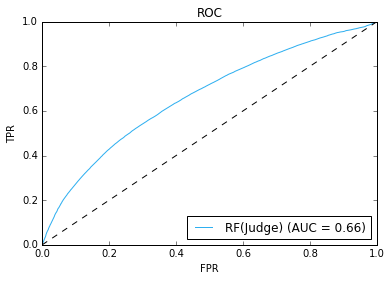

In [208]:
fitRF(appeals_final, ['ij_code'], 'RF(Judge)', 10)

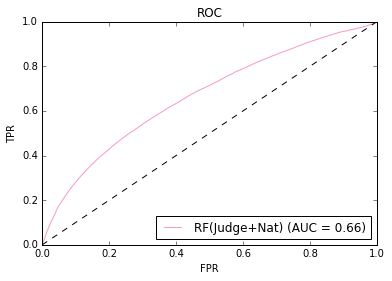

In [203]:
fitRF(appeals_final, ['ij_code', 'nat_string'], 'RF(Judge+Nat)', 10)

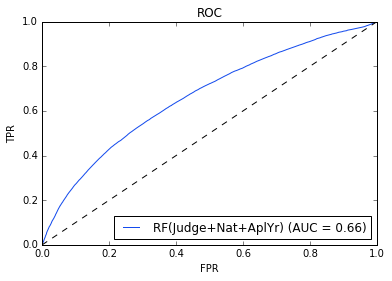

In [207]:
fitRF(appeals_final, ['nat_string', 'ij_code', 'datAppealFiled_year'], 'RF(Judge+Nat+AplYr)', 10)